In [81]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split

In [82]:
civs_path = 'images'

In [83]:
path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)

54


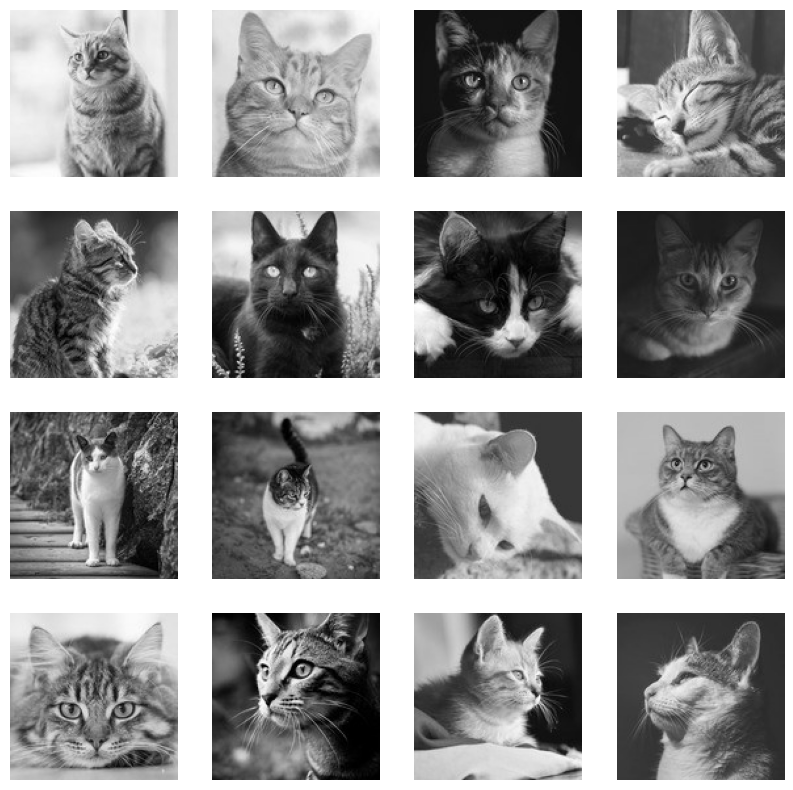

In [84]:
_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [85]:
def label_func2(fname):
    ## print(fname)
    fname = fname.replace("images","")
    temp_name = fname.replace(".jpg", "").split("_")
    ## print(temp_name)
    
                              
    y1 = float(temp_name[1].replace("FPat", ""))     ## 'FPat1'
    y2 = float(temp_name[2].replace("Age", ""))    ## 'Age5'
    y3 = float(temp_name[3].replace("ESze", ""))     ## 'ESze2'
    y4 = float(temp_name[4].replace("NSze", ""))     ## 'NSze1'
    y5 = float(temp_name[5].replace("FThck", ""))     ## 'FThck1'
 
    
 
    ## np.array([y1, y2, y3, y4, y5])
    return [fname, y1, y2, y3, y4, y5]

In [86]:
list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    ## print(img_name)
    
    my_img = Image.open(img_name)
    
    img_np = np.array(my_img)
    
    ## data = np.array(my_img)
    ## print(data)
    ## input()

    ## img_np = img_np.reshape(-1)
    
    temp_label_vector_rc = label_func2(img_name)
    
        ## print(img_np.shape)
    list_imgs.append(img_np)

    list_label_vectors.append( temp_label_vector_rc )

In [87]:
X = list_imgs
y =  list_label_vectors 

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

43
11
43
11


In [89]:
X_train[0]

array([[[ 87,  87,  87],
        [ 86,  86,  86],
        [ 90,  90,  90],
        ...,
        [ 42,  42,  42],
        [ 74,  74,  74],
        [104, 104, 104]],

       [[ 92,  92,  92],
        [ 89,  89,  89],
        [ 77,  77,  77],
        ...,
        [ 97,  97,  97],
        [110, 110, 110],
        [105, 105, 105]],

       [[ 88,  88,  88],
        [ 84,  84,  84],
        [ 66,  66,  66],
        ...,
        [105, 105, 105],
        [ 93,  93,  93],
        [ 54,  54,  54]],

       ...,

       [[ 34,  34,  34],
        [ 35,  35,  35],
        [ 34,  34,  34],
        ...,
        [ 67,  67,  67],
        [ 34,  34,  34],
        [ 16,  16,  16]],

       [[ 79,  79,  79],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 57,  57,  57],
        [ 31,  31,  31],
        [ 45,  45,  45]],

       [[102, 102, 102],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 27,  27,  27],
        [ 22,  22,  22],
        [ 29,  29,  29]]

In [90]:
list_ids_train      = []
list_features_train = []
list_imgs_train     = []


for index in range(len(X_train)):
    
    # image target (label)
    reg_vals = y_train[index]
    target = np.zeros( (10) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
    

        
    list_ids_train.append(          reg_vals[0]                )
    list_imgs_train.append(        single_np_img               )
    list_features_train.append(    target      )

In [91]:
list_imgs_train[0]

array([[[ 87,  87,  87],
        [ 86,  86,  86],
        [ 90,  90,  90],
        ...,
        [ 42,  42,  42],
        [ 74,  74,  74],
        [104, 104, 104]],

       [[ 92,  92,  92],
        [ 89,  89,  89],
        [ 77,  77,  77],
        ...,
        [ 97,  97,  97],
        [110, 110, 110],
        [105, 105, 105]],

       [[ 88,  88,  88],
        [ 84,  84,  84],
        [ 66,  66,  66],
        ...,
        [105, 105, 105],
        [ 93,  93,  93],
        [ 54,  54,  54]],

       ...,

       [[ 34,  34,  34],
        [ 35,  35,  35],
        [ 34,  34,  34],
        ...,
        [ 67,  67,  67],
        [ 34,  34,  34],
        [ 16,  16,  16]],

       [[ 79,  79,  79],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 57,  57,  57],
        [ 31,  31,  31],
        [ 45,  45,  45]],

       [[102, 102, 102],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 27,  27,  27],
        [ 22,  22,  22],
        [ 29,  29,  29]]

In [92]:
list_ids_test      = []
list_features_test = []
list_imgs_test     = []


for index in range(len(X_test)):
    
    # image target (label)
    reg_vals = y_test[index]
    target = np.zeros( (10) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_test[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
        
    list_ids_test.append(          reg_vals[0]                )
    list_imgs_test.append(        single_np_img               )
    list_features_test.append(    target      )

In [93]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [94]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(43, 10)
(11, 10)


In [95]:
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")

In [96]:
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")

In [97]:
list_imgs_train[17]

array([[[240, 240, 240],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [218, 218, 218],
        [219, 219, 219],
        [220, 220, 220]],

       [[239, 239, 239],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [218, 218, 218],
        [219, 219, 219],
        [220, 220, 220]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [218, 218, 218],
        [219, 219, 219],
        [220, 220, 220]],

       ...,

       [[240, 240, 240],
        [240, 240, 240],
        [242, 242, 242],
        ...,
        [218, 218, 218],
        [217, 217, 217],
        [220, 220, 220]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [218, 218, 218],
        [217, 217, 217],
        [221, 221, 221]],

       [[237, 237, 237],
        [236, 236, 236],
        [235, 235, 235],
        ...,
        [218, 218, 218],
        [218, 218, 218],
        [221, 221, 221]]

In [98]:
list_imgs_train[17].shape

(128, 128, 3)

In [99]:
list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]

In [100]:
list_imgs_train_stretched[0]

array([87, 87, 87, ..., 29, 29, 29], dtype=uint8)

In [101]:
list_imgs_train_stretched[4].shape

(49152,)

In [102]:
list_imgs_train_stretched[4][:1000]

array([97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 95, 95,
       95, 94, 94, 94, 93, 93, 93, 92, 92, 92, 87, 87, 87, 81, 81, 81, 76,
       76, 76, 73, 73, 73, 70, 70, 70, 65, 65, 65, 62, 62, 62, 56, 56, 56,
       54, 54, 54, 52, 52, 52, 50, 50, 50, 49, 49, 49, 48, 48, 48, 45, 45,
       45, 43, 43, 43, 40, 40, 40, 38, 38, 38, 37, 37, 37, 36, 36, 36, 36,
       36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 44, 44, 44, 45, 45, 45, 47, 47, 47, 47, 47, 47, 48, 48, 48,
       46, 46, 46, 49, 49, 49, 49, 49, 49, 44, 44, 44, 48, 48, 48, 47, 47,
       47, 56, 56, 56, 53, 53, 53, 49, 49, 49, 53, 53, 53, 53, 53, 53, 50,
       50, 50, 52, 52, 52, 57, 57, 57, 55, 55, 55, 54, 54, 54, 55, 55, 55,
       55, 55, 55, 54, 54, 54, 55, 55, 55, 58, 58, 58, 58, 58, 58, 53, 53,
       53, 56, 56, 56, 58

In [103]:
list_imgs_train_stretched[7].shape

(49152,)

In [104]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (43,) + inhomogeneous part.

In [105]:
np_list_imgs_train_stretched.shape

NameError: name 'np_list_imgs_train_stretched' is not defined

In [106]:
np_list_imgs_train_stretched[3]

NameError: name 'np_list_imgs_train_stretched' is not defined

In [107]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)

NameError: name 'np_list_imgs_train_stretched' is not defined